In [3]:
#Importing openCv both as cv2 and cv for better convinence 
import cv2  
import cv2 as cv 

# Importing numpy for working with numpy arrays
import numpy as np 

# Importing pyplot as plt from maplotlib for Image Visualization
from matplotlib import pyplot as plt 

#Collab not support cv2.imshow method thus, importing cv2.imshow method for better Image visualization 
from google.colab.patches import cv2_imshow  

#Importing PIL library for working with Images
from PIL import Image 

#Importing asarray method from numpy for dealing with pixels of Images
from numpy import asarray 

import matplotlib.image as mpimg

#Importing ndimage from scipy as this package contains various functions for multidimensional image processing.
from scipy import ndimage

#Importing filters, features, measures and color from skimage
from skimage import filters, feature, measure, color

#Importing Watershed for touching Grains sepration
from skimage.segmentation import watershed


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import requests

url="https://s3.amazonaws.com/hr-challenge-images/7028/1426246172-a47e326338-circle3_9.png"
r = requests.get(url)
with open('test.jpg', 'wb') as f:
    f.write(r.content) 
     

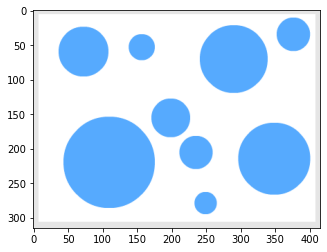

In [2]:
image= cv2.imread('/content/test.jpg')
plt.imshow(image[:,:,::-1])

In [4]:
#Defining show function for displaying  image with custom X and Y cordinates

def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)
     

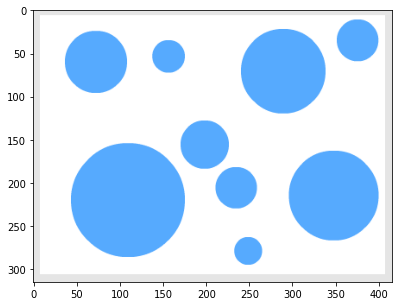

In [5]:
#Reading Image
img = cv2.imread("/content/test.jpg")

#Using predefined show function for displaying the image
show(img,25,5)

In [25]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


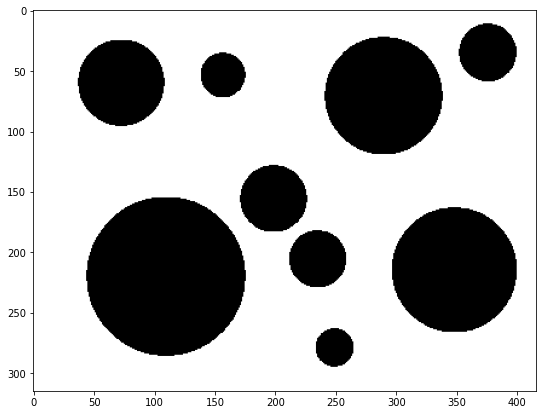

In [14]:
ret, thresh_img = cv2.threshold(grayscale_Image, 160, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)

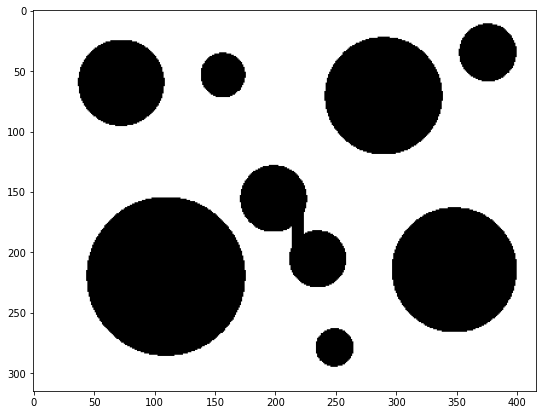

In [15]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

In [18]:
#Copying the preprocessed image as label_image
label_image = clear_image.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count = 0

#Shape function for getting height and width
rows, cols = label_image.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 0 == pixel:
            label_count += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image, None, (i, j), label_count)


Number of foreground objects 8


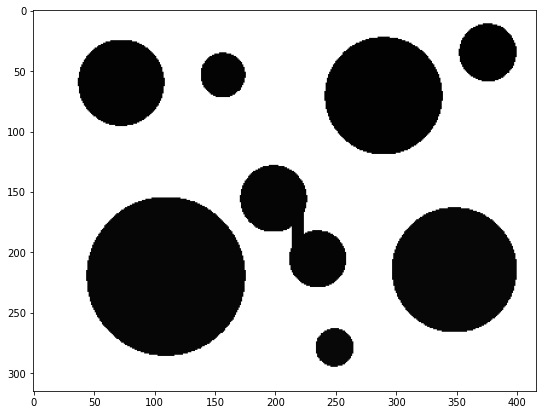

In [19]:
print("Number of foreground objects", label_count)
show(label_image)

In [20]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))
     

Number of detected contours 9


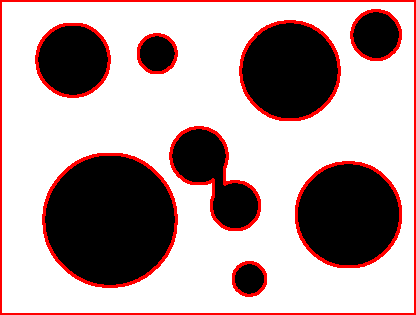

 
 Number of detected contours 9


In [21]:
cv2_imshow(output_contour)

print( len(contours))
     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://s3.amazonaws.com/hr-challenge-images/7028/1426246172-a47e326338-circle3_9.png